In [146]:
from collections import Counter
import json
import pickle
import random
import re
import time

import lyricsgenius
import lyricwikia
from matplotlib import pyplot as plt
import matplotlib
from musixmatch import Musixmatch
from nltk.corpus import stopwords

%matplotlib inline

In [34]:
# Combined meta and basic song info from last time into file
with open('./spotify_top_200_with_meta_20170101-20180101.json') as f:
    stats = json.load(f)

In [35]:
stats.keys()

dict_keys(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25', '2017-02-26', '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-04', '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-11', '2017-03-

In [36]:
# Total number of unique songs
songs = {(track['song'], track['artist']) for day in stats for track in stats[day]}
print(f'Total no. of unique songs: {len(songs)}')
print(songs)

Total no. of unique songs: 1618
{('Wet Dreamz', 'J. Cole'), ('Some Way', 'NAV'), ('Drippy', 'Young Dolph'), ('New Illuminati', 'Future'), ('Doves In The Wind', 'SZA'), ('Life Changes', 'Thomas Rhett'), ('Despacito - Remix', 'Luis Fonsi'), ('Plain Jane REMIX', 'A$AP Ferg'), ('Flip', 'Future'), ('Revival (Interlude)', 'Eminem'), ('Rise Up', 'Imagine Dragons'), ("We Don't Talk Anymore (feat. Selena Gomez)", 'Charlie Puth'), ("Can't Have Everything", 'Drake'), ("She's Mine Pt. 1", 'J. Cole'), ('Still Serving', '21 Savage'), ('LUST.', 'Kendrick Lamar'), ('In My Feelings', 'Lana Del Rey'), ('A Lie', 'French Montana'), ('Cash Machine', 'DRAM'), ('No Comparison', 'A Boogie Wit da Hoodie'), ('Good Man (feat. Pusha T & Jadakiss)', 'DJ Khaled'), ('OK', 'Robin Schulz'), ('Stayin\' Alive - From "Saturday Night Fever" Soundtrack', 'Bee Gees'), ('Caroline', 'Aminé'), ('Nasty (Who Dat)', 'A$AP Ferg'), ('Free Smoke', 'Drake'), ('Gang Up (with Young Thug, 2 Chainz & Wiz Khalifa feat. PnB Rock)', 'Young 

In [37]:
stats['2017-01-01'][2]

{'position': '3',
 'song': 'Starboy',
 'artist': 'The Weeknd',
 'streams': '1,064,351',
 'meta': {'track_id': 114837357,
  'track_name': 'Starboy',
  'track_name_translation_list': [],
  'track_rating': 83,
  'commontrack_id': 63309876,
  'instrumental': 0,
  'explicit': 1,
  'has_lyrics': 1,
  'has_subtitles': 1,
  'has_richsync': 1,
  'num_favourite': 26808,
  'album_id': 23977356,
  'album_name': 'Starboy',
  'artist_id': 32104638,
  'artist_name': 'The Weeknd feat. Daft Punk',
  'track_share_url': 'https://www.musixmatch.com/lyrics/The-Weeknd-feat-Daft-Punk/Starboy?utm_source=application&utm_campaign=api&utm_medium=',
  'track_edit_url': 'https://www.musixmatch.com/lyrics/The-Weeknd-feat-Daft-Punk/Starboy/edit?utm_source=application&utm_campaign=api&utm_medium=',
  'restricted': 0,
  'updated_time': '2016-09-22T10:10:59Z',
  'primary_genres': {'music_genre_list': [{'music_genre': {'music_genre_id': 7,
      'music_genre_parent_id': 34,
      'music_genre_name': 'Electronic',
      

In [12]:
m = Musixmatch('866c170bce14ac32778c7b92dc03701d')

In [19]:
# Let's get the lyrics for Starboy by The Weeknd
lyrics = m.track_lyrics_get('114837357')
lyrics

{'message': {'header': {'status_code': 200, 'execute_time': 0.099917888641357},
  'body': {'lyrics': {'lyrics_id': 15915537,
    'explicit': 1,
    'lyrics_body': "I'm tryna put you in the worst mood, ah\nP1 cleaner than your church shoes, ah\nMilli point two just to hurt you, ah\nAll red Lamb' just to tease you, ah\nNone of these toys on lease too, ah\nMade your whole year in a week too, yah\nMain bitch out your league too, ah\nSide bitch out of your league too, ah\n\nHouse so empty, need a centerpiece\nTwenty racks a table, carved from ebony\nCut that ivory into skinny pieces\nThen she clean it with her face man I love my baby\nYou talking money, need a hearing aid\nYou talking 'bout me, I don't see a shade\nSwitch out my side, I'll take any lane\nI switch out my car if I kill any pain\n\nLook what you've done\nI'm a motherfucking Starboy\nLook what you've done\nI'm a motherfucking Starboy\n\nEvery day a nigga try to test me, ah\n...\n\n******* This Lyrics is NOT for Commercial use *

In [26]:
# Only 30%?!
print(lyrics['message']['body']['lyrics']['lyrics_body'])

I'm tryna put you in the worst mood, ah
P1 cleaner than your church shoes, ah
Milli point two just to hurt you, ah
All red Lamb' just to tease you, ah
None of these toys on lease too, ah
Made your whole year in a week too, yah
Main bitch out your league too, ah
Side bitch out of your league too, ah

House so empty, need a centerpiece
Twenty racks a table, carved from ebony
Cut that ivory into skinny pieces
Then she clean it with her face man I love my baby
You talking money, need a hearing aid
You talking 'bout me, I don't see a shade
Switch out my side, I'll take any lane
I switch out my car if I kill any pain

Look what you've done
I'm a motherfucking Starboy
Look what you've done
I'm a motherfucking Starboy

Every day a nigga try to test me, ah
...

******* This Lyrics is NOT for Commercial use *******
(1409618279599)


In [28]:
lyrics = lyricwikia.get_lyrics('The Weeknd', 'Starboy')
print(lyrics)

I'm tryna put you in the worst mood, ah
P1 cleaner than your church shoes, ah
Milli point two just to hurt you, ah
All red Lamb' just to tease you, ah

None of these toys on lease too, ah
Made your whole year in a week too, yah
Main bitch out of your league too, ah
Side bitch out of your league too, ah

House so empty, need a centerpiece
20 racks a table cut from ebony
Cut that ivory into skinny pieces
Then she clean it with her face
Man, I love my baby

You talking money, need a hearing aid
You talking 'bout me, I don't see the shade
Switch up my style, I take any lane
I switch up my cup, I kill any pain

(Ha-ha-ha-ha-ha-ha-ha-ha-ha-ha)
Look what you've done
(Ha-ha-ha-ha-ha-ha-ha-ha-ha-ha)
I'm a motherfuckin' starboy
(Ha-ha-ha-ha-ha-ha-ha-ha-ha-ha)
Look what you've done
(Ha-ha-ha-ha-ha-ha-ha-ha-ha-ha)
I'm a motherfuckin' starboy

Every day a nigga try to test me, ah
Every day a nigga try to end me, ah
Pull off in that Roadster SV, ah
Pockets overweight, gettin' hefty, ah

Coming for t

In [39]:
lyric_dict = {}
not_found = set()
for idx, (song, artist) in enumerate(songs, 1):
    try:
        lyric_dict[(song, artist)] = lyricwikia.get_lyrics(artist, song)
    except lyricwikia.LyricsNotFound:
        print(f'Cannot find {song} by {artist}.')
        not_found.add((song, artist))
    time.sleep(random.randint(1, 3))
    if idx % 100 == 0:
        print(f'Completed {idx}...')
print(f'Could not find {len(not_found)} lyrics.')

Cannot find Drippy by Young Dolph.
Cannot find Doves In The Wind by SZA.
Cannot find Despacito - Remix by Luis Fonsi.
Cannot find Plain Jane REMIX by A$AP Ferg.
Cannot find She's Mine Pt. 1 by J. Cole.
Cannot find Still Serving by 21 Savage.
Cannot find Cash Machine by DRAM.
Cannot find OK by Robin Schulz.
Cannot find Stayin' Alive - From "Saturday Night Fever" Soundtrack by Bee Gees.
Cannot find Nasty (Who Dat) by A$AP Ferg.
Cannot find Gang Up (with Young Thug, 2 Chainz & Wiz Khalifa feat. PnB Rock) by Young Thug.
Cannot find Shed a Light by Robin Schulz.
Cannot find Christmas Eve - Recorded at Spotify Studios NYC by Kelly Clarkson.
Cannot find Shooters by Tory Lanez.
Cannot find Get Low (with Liam Payne) by Zedd.
Cannot find Heavy (feat. Kiiara) by Linkin Park.
Cannot find GOOD MORNING AMERIKKKA by Joey Bada$$.
Cannot find TEMPTATION by Joey Bada$$.
Cannot find Trap And A Dream by A$AP Ferg.
Cannot find Never Be the Same - Radio Edit by Camila Cabello.
Cannot find Skateboard P (feat

Cannot find So Good (& Metro Boomin) by Big Sean.
Cannot find My Dawg by Quality Control.
Cannot find 4 AM by 2 Chainz.
Cannot find Romantic - NOTD Remix by Stanaj.
Cannot find Walk On Water by A$AP Mob.
Cannot find Shook Ones, Pt. II by Mobb Deep.
Cannot find Supermodel by SZA.
Cannot find Work REMIX by A$AP Ferg.
Cannot find HOLD ME TIGHT OR DON’T by Fall Out Boy.
Cannot find top priority (with Ne-Yo) by blackbear.
Cannot find I Think Of You by Jeremih.
Cannot find Rubbin Off The Paint by YBN Nahmir.
Cannot find Sex for Breakfast by Life of Dillon.
Cannot find The Greatest Show by Hugh Jackman.
Cannot find Mi Gente (feat. Beyoncé) by J Balvin.
Cannot find Too Many Years by Kodak Black.
Cannot find Come Closer by WizKid.
Cannot find Taped Up Heart (feat. Clara Mae) by KREAM.
Cannot find Killing Time by R3HAB.
Cannot find Damage by PARTYNEXTDOOR.
Completed 600...
Cannot find Love U Better (feat. Lil Wayne & The-Dream) by Ty Dolla $ign.
Cannot find A Holly Jolly Christmas - Single Versi

Cannot find Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors) by Lil Wayne.
Cannot find High Without Your Love by Loote.
Cannot find RING THE ALARM (feat. Nyck Caution, Kirk Knight & Meechy Darko) by Joey Bada$$.
Cannot find Rockin’ by The Weeknd.
Cannot find Call Me by NAV.
Cannot find I'll Be Home For Christmas - Recorded at Spotify Studios NYC by Demi Lovato.
Cannot find All I Want For Christmas (Is My Two Front Teeth) - Remastered by Nat King Cole Trio.
Cannot find So Close by Andrew McMahon in the Wilderness.
Cannot find Middle by DJ Snake.
Cannot find dimple by BTS.
Cannot find Frat Rules by A$AP Mob.
Cannot find MotorSport by Migos.
Cannot find (Intro) I'm so Grateful (feat. Sizzla) by DJ Khaled.
Cannot find I Miss You by Grey.
Cannot find Lil Favorite (feat. MadeinTYO) by Ty Dolla $ign.
Cannot find F*ck Up Some Commas by Future.
Cannot find Have Yourself A Merry Little Christmas by Sam Smith.
Completed 1200...
Cannot find Can't Hold 

In [43]:
# Let's see which database is more robust. Just for fun?
genius = lyricsgenius.Genius('KRi_eRUm3yLWgNuWbZnMjW8fq2Z60CXTTqYbQYl16ZoJ-BPXABqbzNsq6ZPMTlWh')
genius.remove_section_headers = True

In [47]:
song_dict = {}
failed = set()

for idx, (song, artist) in enumerate(songs, 1):
    result = genius.search_song(song, artist, get_full_info=False)
    if not result:
        print(f'Could not find {song} by {artist}')
        failed.add((song, artist))
        lyrics = None
    else:
        lyrics = result.lyrics
    
    song_dict[(song, artist)] = lyrics
    if idx % 100 == 0:
        print(f'Completed {idx}...')
    time.sleep(random.randint(1, 3))

print(f'Could not find {len(failed)} lyrics.')

Searching for "Wet Dreamz" by J. Cole...
Done.
Searching for "Some Way" by NAV...
Done.
Searching for "Drippy" by Young Dolph...
Done.
Searching for "New Illuminati" by Future...
Done.
Searching for "Doves In The Wind" by SZA...
Done.
Searching for "Life Changes" by Thomas Rhett...
Done.
Searching for "Despacito - Remix" by Luis Fonsi...
Done.
Searching for "Plain Jane REMIX" by A$AP Ferg...
Done.
Searching for "Flip" by Future...
Done.
Searching for "Revival (Interlude)" by Eminem...
Done.
Searching for "Rise Up" by Imagine Dragons...
Done.
Searching for "We Don't Talk Anymore (feat. Selena Gomez)" by Charlie Puth...
Done.
Searching for "Can't Have Everything" by Drake...
Done.
Searching for "She's Mine Pt. 1" by J. Cole...
Done.
Searching for "Still Serving" by 21 Savage...
Done.
Searching for "LUST." by Kendrick Lamar...
Done.
Searching for "In My Feelings" by Lana Del Rey...
Done.
Searching for "A Lie" by French Montana...
Done.
Searching for "Cash Machine" by DRAM...
Done.
Searchi

Done.
Searching for "Again" by Noah Cyrus...
Done.
Searching for "Everybody" by Logic...
Done.
Searching for "Kiwi" by Harry Styles...
Done.
Searching for "Remind Me" by Eminem...
Done.
Searching for "Bom Bidi Bom - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"" by Nick Jonas...
No results found for: 'Bom Bidi Bom - From "Fifty Shades Darker (Original Motion Picture Soundtrack)" Nick Jonas'
Could not find Bom Bidi Bom - From "Fifty Shades Darker (Original Motion Picture Soundtrack)" by Nick Jonas
Searching for "Born In The U.S.A." by Bruce Springsteen...
Done.
Searching for "My Choppa Hate Niggas" by 21 Savage...
Done.
Searching for "Lot to Learn" by Luke Christopher...
Done.
Searching for "Wanted You (feat. Lil Uzi Vert)" by NAV...
Done.
Searching for "Battle Symphony" by Linkin Park...
Done.
Searching for "Small Town Boy" by Dustin Lynch...
Done.
Searching for "Anziety" by Logic...
Done.
Searching for "High Demand" by Future...
Done.
Searching for "Coolin and Booted

Searching for "Underneath the Tree" by Kelly Clarkson...
Done.
Searching for "Kept Me Crying" by HAIM...
Done.
Searching for "Six Feet Under" by The Weeknd...
Done.
Searching for "Sober II (Melodrama)" by Lorde...
Done.
Searching for "Exchange" by Bryson Tiller...
Done.
Searching for "Location" by Khalid...
Done.
Searching for "DUCKWORTH." by Kendrick Lamar...
Done.
Searching for "God Rest Ye Merry Gentlemen - Single Version" by Bing Crosby...
Done.
Searching for "OK (feat. Lil Pump)" by Smokepurpp...
Done.
Searching for "Revenge" by XXXTENTACION...
Done.
Searching for "Back (feat. Lil Yachty)" by Lil Pump...
Done.
Searching for "Starving" by Hailee Steinfeld...
Done.
Searching for "Rudolph the Rednose Reindeer" by DMX...
Done.
Searching for "Hotline Bling" by Drake...
Done.
Searching for "My Girl" by Dylan Scott...
Done.
Searching for "Even The Odds (& Metro Boomin)" by Big Sean...
Done.
Searching for "Wonderwall - Remastered" by Oasis...
No results found for: 'Wonderwall - Remastered

Done.
Searching for "Courtesy Of The Red, White And Blue (The Angry American)" by Toby Keith...
Done.
Searching for "Getaway Car" by Taylor Swift...
Done.
Searching for "A Thousand Years" by Christina Perri...
Done.
Searching for "Bad Husband (feat. X Ambassadors)" by Eminem...
Done.
Searching for "Somebody Else" by VÉRITÉ...
Done.
Searching for "Krippy Kush - Remix" by Farruko...
Done.
Searching for "How U Feel" by Huncho Jack...
Done.
Searching for "Purple Rain" by Prince...
Done.
Searching for "I'm so Groovy" by Future...
Done.
Searching for "Sometimes..." by Tyler, The Creator...
Done.
Searching for "Teenage Fever" by Drake...
Done.
Searching for "Legend" by G-Eazy...
Done.
Searching for "Silent Night" by Carpenters...
Done.
Searching for "Merry Christmas, Happy Holidays" by *NSYNC...
Done.
Searching for "Despacito (Featuring Daddy Yankee)" by Luis Fonsi...
Done.
Searching for "All I Know" by The Weeknd...
Done.
Searching for "Crazy" by Lil Pump...
Done.
Searching for "Mr. Brightsi

No results found for: 'City Of Stars - From "La La Land" Soundtrack Ryan Gosling'
Could not find City Of Stars - From "La La Land" Soundtrack by Ryan Gosling
Searching for "Work" by Rihanna...
Done.
Searching for "What Ifs" by Kane Brown...
Done.
Searching for "Tragic Endings (feat. Skylar Grey)" by Eminem...
Done.
Searching for "PRBLMS" by 6LACK...
Done.
Searching for "A$AP Ferg" by NAV...
Done.
Searching for "I Thank U" by Future...
Done.
Searching for "Light" by San Holo...
Done.
Searching for "Chantaje" by Shakira...
Done.
Searching for "I Like Me Better" by Lauv...
Done.
Searching for "Gangsta" by Kehlani...
Done.
Searching for "Born This Way" by Lady Gaga...
Done.
Searching for "Bad Blood" by Taylor Swift...
Done.
Searching for "Stargazing" by Kygo...
Done.
Searching for "RAF" by A$AP Mob...
Done.
Searching for "Dead Inside (Interlude)" by XXXTENTACION...
Done.
Searching for "What Child Is This?/The Holly And The Ivy" by Bing Crosby...
Done.
Searching for "Love Yourself" by Justi

Done.
Searching for "Don't Judge Me (feat. Future and Swae Lee)" by Ty Dolla $ign...
Done.
Searching for "Escápate Conmigo" by Wisin...
Done.
Searching for "Sit Next to Me" by Foster The People...
Done.
Searching for "Love Galore (feat. Travis Scott)" by SZA...
Specified song does not contain lyrics. Rejecting.
Could not find Love Galore (feat. Travis Scott) by SZA
Searching for "gucci linen (feat. 2 Chainz)" by blackbear...
Done.
Searching for "Questions" by Chris Brown...
Done.
Searching for "679 (feat. Remy Boyz)" by Fetty Wap...
Done.
Searching for "Champions" by Kanye West...
Done.
Searching for "Don't Say" by The Chainsmokers...
Done.
Searching for "Portland" by Drake...
Done.
Searching for "Échame La Culpa" by Luis Fonsi...
Done.
Searching for "20 Min" by Lil Uzi Vert...
Done.
Searching for "O Little Town of Bethlehem" by Elvis Presley...
Done.
Searching for "Supercut" by Lorde...
Done.
Searching for "Whatever (feat. Future, Young Thug, Rick Ross & 2 Chainz)" by DJ Khaled...
Don

No results found for: 'Have Yourself A Merry Little Christmas - "Meet Me In St. Louis" Original Cast Recording Judy Garland'
Could not find Have Yourself A Merry Little Christmas - "Meet Me In St. Louis" Original Cast Recording by Judy Garland
Searching for "No Scrubs" by TLC...
Done.
Searching for "Bodak Yellow" by Cardi B...
Done.
Searching for "Neon Guts (feat. Pharrell Williams)" by Lil Uzi Vert...
Done.
Searching for "Mask Off - Remix" by Future...
Done.
Searching for "I'll Be Home For Christmas - Single Version" by Bing Crosby...
Done.
Searching for "Love So Soft" by Kelly Clarkson...
Done.
Searching for "Two Ghosts" by Harry Styles...
Done.
Searching for "Crew (feat. Brent Faiyaz & Shy Glizzy)" by GoldLink...
Done.
Searching for "Thriller" by Michael Jackson...
Done.
Searching for "Poker Face" by Lady Gaga...
Done.
Searching for "Dominick The Donkey (The Italian Christmas Donkey) [With Joe Reisman's Orchestra and Chorus]" by Lou Monte...
No results found for: 'Dominick The Donke

Done.
Searching for "Earned It (Fifty Shades Of Grey)" by The Weeknd...
Done.
Searching for "I Have Questions" by Camila Cabello...
Done.
Searching for "Blowing Smoke" by Bryson Tiller...
Done.
Searching for "Big On Big" by Migos...
Done.
Searching for "The Cure" by Lady Gaga...
Done.
Searching for "Now Or Never" by Halsey...
Done.
Searching for "Bibia Be Ye Ye" by Ed Sheeran...
Done.
Searching for "Too Much Sauce" by DJ Esco...
Done.
Searching for "Oceans Away" by A R I Z O N A...
Done.
Searching for "Bartier Cardi (feat. 21 Savage)" by Cardi B...
Done.
Searching for "Ayala (Outro)" by XXXTENTACION...
Done.
Searching for "Yeah Right" by Vince Staples...
Done.
Searching for "Rain Interlude" by Bryson Tiller...
Done.
Searching for "I Write Sins Not Tragedies" by Panic! At The Disco...
Done.
Searching for "Havana" by Camila Cabello...
Done.
Searching for "Big Bidness (& Metro Boomin)" by Big Sean...
Done.
Searching for "Betrayed" by Lil Xan...
Done.
Searching for "Good Drank" by 2 Chainz

Done.
Searching for "Ain't No Mountain High Enough" by Marvin Gaye...
Done.
Searching for "So It Goes..." by Taylor Swift...
Done.
Searching for "You Can't Hurry Love - 2016 Remastered" by Phil Collins...
No results found for: 'You Can't Hurry Love - 2016 Remastered Phil Collins'
Could not find You Can't Hurry Love - 2016 Remastered by Phil Collins
Searching for "Vuelve" by Daddy Yankee...
Done.
Searching for "Jingle Bell Rock" by Bobby Helms...
Done.
Searching for "Nothings Into Somethings" by Drake...
Done.
Searching for "Reason (& Metro Boomin)" by Big Sean...
Done.
Searching for "Dab of Ranch - Recorded at Spotify Studios NYC" by Migos...
No results found for: 'Dab of Ranch - Recorded at Spotify Studios NYC Migos'
Could not find Dab of Ranch - Recorded at Spotify Studios NYC by Migos
Searching for "Santa Claus Is Comin' to Town - Live at C.W. Post College, Greenvale, NY - December 1975" by Bruce Springsteen...
No results found for: 'Santa Claus Is Comin' to Town - Live at C.W. Post

Done.
Searching for "No Flag" by London On Da Track...
Done.
Searching for "Blue Cheese" by 2 Chainz...
Done.
Searching for "Midnight Train" by Sam Smith...
Done.
Searching for "Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)" by Lil Wayne...
Done.
Searching for "High Without Your Love" by Loote...
Done.
Searching for "RING THE ALARM (feat. Nyck Caution, Kirk Knight & Meechy Darko)" by Joey Bada$$...
Specified song does not contain lyrics. Rejecting.
Could not find RING THE ALARM (feat. Nyck Caution, Kirk Knight & Meechy Darko) by Joey Bada$$
Searching for "If I'm Lucky" by Jason Derulo...
Done.
Searching for "Do Not Disturb" by Drake...
Done.
Searching for "oui" by Jeremih...
Done.
Searching for "Wanna Be That Song" by Brett Eldredge...
Done.
Searching for "Rockin’" by The Weeknd...
Done.
Searching for "There's Nothing Holdin' Me Back" by Shawn Mendes...
Done.
Searching for "Call Me" by NAV...
Done.
Searching for "Joy To The World" by Nat

Done.
Searching for "Drugs" by August Alsina...
Done.
Searching for "Blank Space" by Taylor Swift...
Done.
Searching for "Skir Skirr" by Lil Uzi Vert...
Done.
Searching for "Perfect Places" by Lorde...
Done.
Searching for "Dress" by Taylor Swift...
Done.
Searching for "Riverdale Rd" by 2 Chainz...
Done.
Searching for "You Make My Dreams" by Daryl Hall & John Oates...
Done.
Searching for "No Such Thing as a Broken Heart" by Old Dominion...
Done.
Searching for "Brown Paper Bag" by Migos...
Done.
Searching for "Love Story" by Taylor Swift...
Done.
Searching for "Bad Things (with Camila Cabello)" by Machine Gun Kelly...
Done.
Searching for "Love (feat. Rae Sremmurd)" by ILoveMakonnen...
Done.
Searching for "I Just Can't" by R3HAB...
Done.
Searching for "The Other Side" by Hugh Jackman...
Done.
Searching for "Run Up the Racks" by 21 Savage...
Done.
Searching for "Touch" by Little Mix...
Done.
Searching for "My Shit" by A Boogie Wit da Hoodie...
Done.
Searching for "Same Drugs" by Chance the

Done.
Searching for "Carolina" by Harry Styles...
Done.
Searching for "Say It First" by Sam Smith...
Done.
Searching for "It's Secured (feat. Nas & Travis Scott)" by DJ Khaled...
Done.
Searching for "The First Noel - Remastered 1999" by Frank Sinatra...
Done.
Searching for "Bon appétit" by Katy Perry...
Done.
Searching for "Cherry" by Lana Del Rey...
Done.
Searching for "Mele Kalikimaka - Single Version" by Bing Crosby...
Done.
Completed 1400...
Searching for "Eyes Closed" by Halsey...
Done.
Searching for "Meant to Be (feat. Florida Georgia Line)" by Bebe Rexha...
Done.
Searching for "Finding You" by Kesha...
Done.
Searching for "May We All" by Florida Georgia Line...
Done.
Searching for "Chained To The Rhythm" by Katy Perry...
Done.
Searching for "Lonely Together (feat. Rita Ora)" by Avicii...
Done.
Searching for "This Is What You Came For" by Calvin Harris...
Done.
Searching for "Don't Quit (feat. Travis Scott & Jeremih)" by DJ Khaled...
Done.
Searching for "Dead Presidents" by Rick 

Done.
Searching for "Not Nice" by PARTYNEXTDOOR...
Done.
Searching for "It's A Vibe" by 2 Chainz...
Done.
Searching for "That's What I Like" by Bruno Mars...
Done.
Searching for "7 Min Freestyle" by 21 Savage...
Done.
Searching for "Baby, It's Cold Outside (Glee Cast Version)" by Glee Cast...
Done.
Searching for "Skateboard P" by MadeinTYO...
Done.
Searching for "Pretty Girl - Cheat Codes X CADE Remix" by Maggie Lindemann...
Done.
Searching for "Headlines" by Drake...
Done.
Searching for "Wild Thoughts (feat. Rihanna & Bryson Tiller)" by DJ Khaled...
Done.
Searching for "Benz Truck - гелик" by Lil Peep...
Done.
Searching for "Let's Start The New Year Off Right" by Bing Crosby...
Done.
Searching for "Drink A Little Beer" by Thomas Rhett...
Done.
Searching for "Cake - Challenge Version" by Flo Rida...
Done.
Searching for "I Don't Fuck With You" by Big Sean...
Done.
Searching for "Rain On Me (Intro)" by Bryson Tiller...
Done.
Searching for "Scrape" by Future...
Done.
Searching for "Lovin'

In [53]:
# Genius (57 not found) is clearly much better than LyricWiki (454 not found).

In [51]:
with open('spotify_lyrics.pkl', 'wb') as f:
    pickle.dump(song_dict, f)

In [54]:
def add_attr(track, attr, attr_dict):
    song = track['song']
    artist = track['artist']
    a = attr_dict.get((song, artist))
    if not a:
        print(f'{attr} not found for: {song} by {artist}')
    track[attr] = a
    return track

In [55]:
for date in stats:
    for track in stats[date]:
        add_attr(track, 'lyrics', song_dict)

lyrics not found for: I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)" by ZAYN
lyrics not found for: No Problem (feat. Lil Wayne & 2 Chainz) by Chance the Rapper
lyrics not found for: CAN'T STOP THE FEELING! (Original Song from DreamWorks Animation's "TROLLS") by Justin Timberlake
lyrics not found for: Happy - From "Despicable Me 2" by Pharrell Williams
lyrics not found for: Can't Hold Us - feat. Ray Dalton by Macklemore & Ryan Lewis
lyrics not found for: Stayin' Alive - From "Saturday Night Fever" Soundtrack by Bee Gees
lyrics not found for: Timeless (DJ SPINKING) by A Boogie Wit da Hoodie
lyrics not found for: (I Can't Get No) Satisfaction - Mono Version / Remastered 2002 by The Rolling Stones
lyrics not found for: You Can't Hurry Love - 2016 Remastered by Phil Collins
lyrics not found for: I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)" by ZAYN
lyrics 

lyrics not found for: Pull Up N Wreck (With Metro Boomin) by Big Sean
lyrics not found for: Love Galore (feat. Travis Scott) by SZA
lyrics not found for: Friends (with BloodPop®) by Justin Bieber
lyrics not found for: I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)" by ZAYN
lyrics not found for: No Problem (feat. Lil Wayne & 2 Chainz) by Chance the Rapper
lyrics not found for: Love Galore (feat. Travis Scott) by SZA
lyrics not found for: Pull Up N Wreck (With Metro Boomin) by Big Sean
lyrics not found for: Friends (with BloodPop®) by Justin Bieber
lyrics not found for: I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)" by ZAYN
lyrics not found for: No Problem (feat. Lil Wayne & 2 Chainz) by Chance the Rapper
lyrics not found for: Love Galore (feat. Travis Scott) by SZA
lyrics not found for: Pull Up N Wreck (With Metro Boomin) by Big Sean
lyrics not found for

In [100]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [106]:
# Get unique lyrics for each genre

def get_genre(track):
    if not track['meta']:
        return ['Unknown']
    genre_list = track['meta']['primary_genres']['music_genre_list']
    if not genre_list:
        return ['Unknown']
    genres = [genre_dict['music_genre']['music_genre_name'] for genre_dict in genre_list]
    return genres

def get_lyrics(stats):
    genre_lyric_dict = {}
    for date in stats:
        for track in stats[date]:
            genres = get_genre(track)
            lyrics = track['lyrics']
            if not lyrics:
                continue
            for genre in genres:
                lyric_set = genre_lyric_dict.get(genre, set())
                lyric_set.add(lyrics)
                genre_lyric_dict[genre] = lyric_set
    return genre_lyric_dict
                
def preprocess(genre_lyric_dict):
    genre_lyric_freq = {}
    en_stop = stopwords.words('english')
    for genre in genre_lyric_dict:
        lyric_list = []
        lyrics = genre_lyric_dict[genre]
        for lyric in lyrics:
            lyric = [word.lower() for word in re.split(r'\s', lyric) if word.lower() not in en_stop and word.isalpha()]
            lyric_list.extend(lyric)
        genre_lyric_freq[genre] = Counter(lyric_list)
        
    return genre_lyric_freq

In [79]:
genre_lyric_dict = get_lyrics(stats)

In [80]:
print(genre_lyric_dict.keys())

dict_keys(['Unknown', 'Hip Hop/Rap', 'Electronic', 'Pop', 'Contemporary R&B', 'Garage', 'Afro-Beat', 'Dancehall', 'Disco', 'Funk', 'R&B/Soul', 'Dance', 'Reggae', 'Alternative Rap', 'Hip-Hop', 'Folk', 'House', 'Rock', 'Alternative', 'Punk', 'Jazz', 'Electronica', 'Country Blues', 'Contemporary Country', 'Country', 'Big Band', 'Dubstep', 'Singer/Songwriter', 'Folk-Rock', 'Pop/Rock', 'Soul', 'East Coast Rap', 'Soft Rock', 'Classical Crossover', 'Contemporary Folk', 'Celtic Folk', 'Traditional Country', 'Indie Rock', 'Latin Urban', 'Southern Gospel', 'Salsa y Tropical', 'EMO', 'Pop Punk', 'Teen Pop', 'Latin', 'Pop in Spanish', 'Psychedelic', 'Indie Pop', 'Heavy Metal', 'Ambient', 'Dirty South', 'K-Pop', 'Gospel', 'Christmas', 'Holiday', 'Vocal', 'Easy Listening'])


In [107]:
genre_lyric_counter = preprocess(genre_lyric_dict)

In [103]:
genre_lyric_counter.keys()

dict_keys(['Unknown', 'Hip Hop/Rap', 'Electronic', 'Pop', 'Contemporary R&B', 'Garage', 'Afro-Beat', 'Dancehall', 'Disco', 'Funk', 'R&B/Soul', 'Dance', 'Reggae', 'Alternative Rap', 'Hip-Hop', 'Folk', 'House', 'Rock', 'Alternative', 'Punk', 'Jazz', 'Electronica', 'Country Blues', 'Contemporary Country', 'Country', 'Big Band', 'Dubstep', 'Singer/Songwriter', 'Folk-Rock', 'Pop/Rock', 'Soul', 'East Coast Rap', 'Soft Rock', 'Classical Crossover', 'Contemporary Folk', 'Celtic Folk', 'Traditional Country', 'Indie Rock', 'Latin Urban', 'Southern Gospel', 'Salsa y Tropical', 'EMO', 'Pop Punk', 'Teen Pop', 'Latin', 'Pop in Spanish', 'Psychedelic', 'Indie Pop', 'Heavy Metal', 'Ambient', 'Dirty South', 'K-Pop', 'Gospel', 'Christmas', 'Holiday', 'Vocal', 'Easy Listening'])

In [189]:
plt.style.use('fivethirtyeight')

def plot(dic, genre, types=10):
    fig, ax = plt.subplots()
    labels, values = zip(*dic[genre].most_common(types))
    ax.bar(labels, values)
    ax.set_title(genre)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    plt.show()

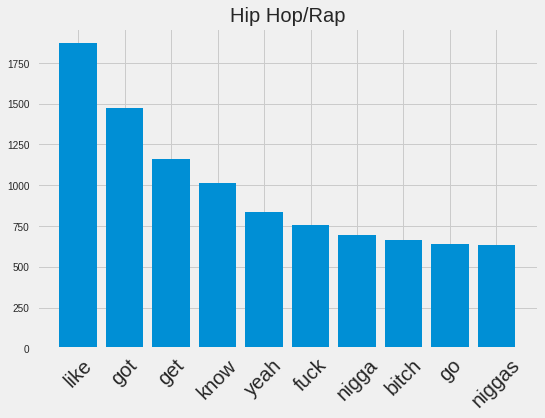

In [190]:
plot(genre_lyric_counter, 'Hip Hop/Rap')

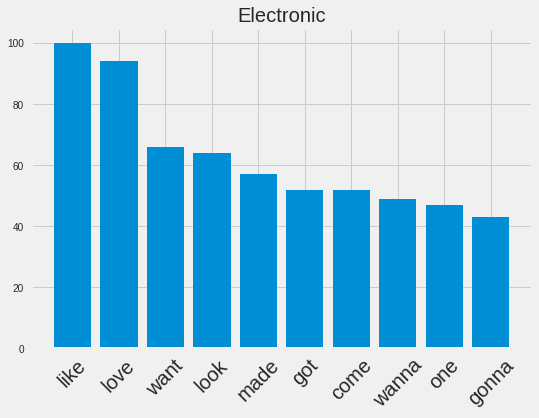

In [191]:
plot(genre_lyric_counter, 'Electronic')

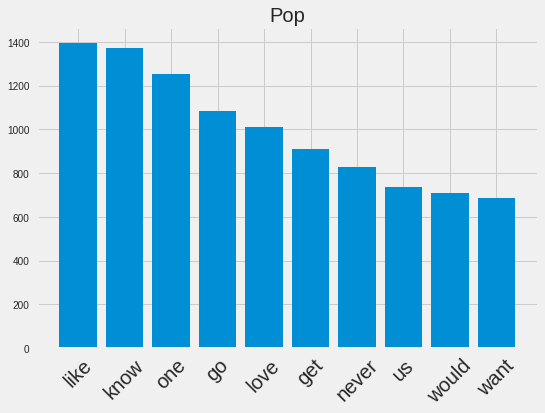

In [192]:
plot(genre_lyric_counter, 'Pop')

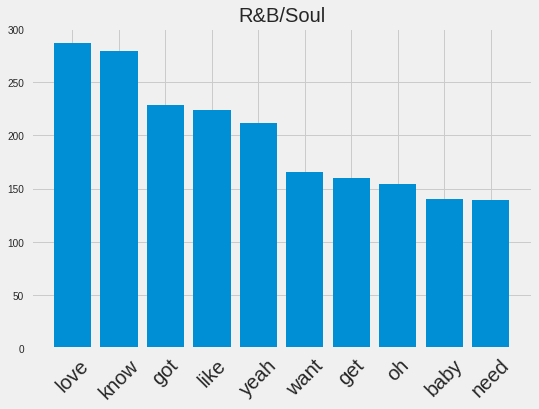

In [193]:
plot(genre_lyric_counter, 'R&B/Soul')

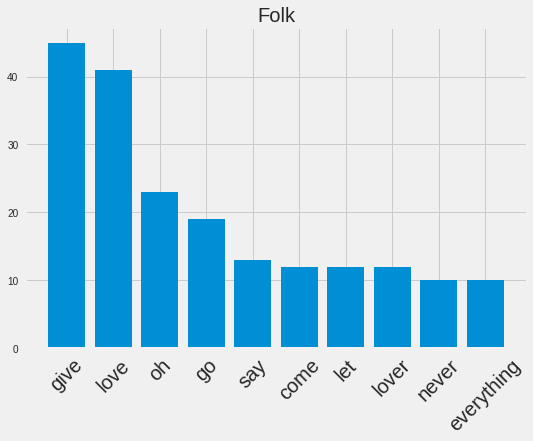

In [194]:
plot(genre_lyric_counter, 'Folk')

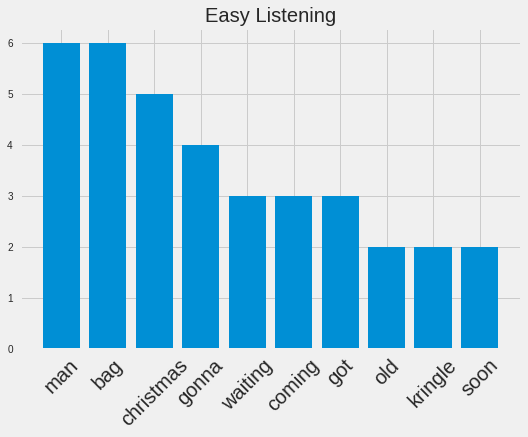

In [195]:
plot(genre_lyric_counter, 'Easy Listening')

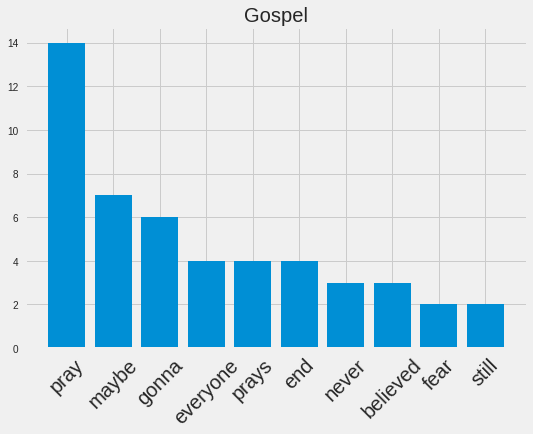

In [196]:
plot(genre_lyric_counter, 'Gospel')

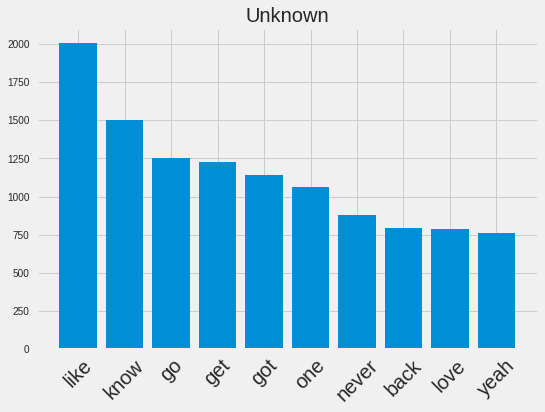

In [197]:
plot(genre_lyric_counter, 'Unknown')